d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_e

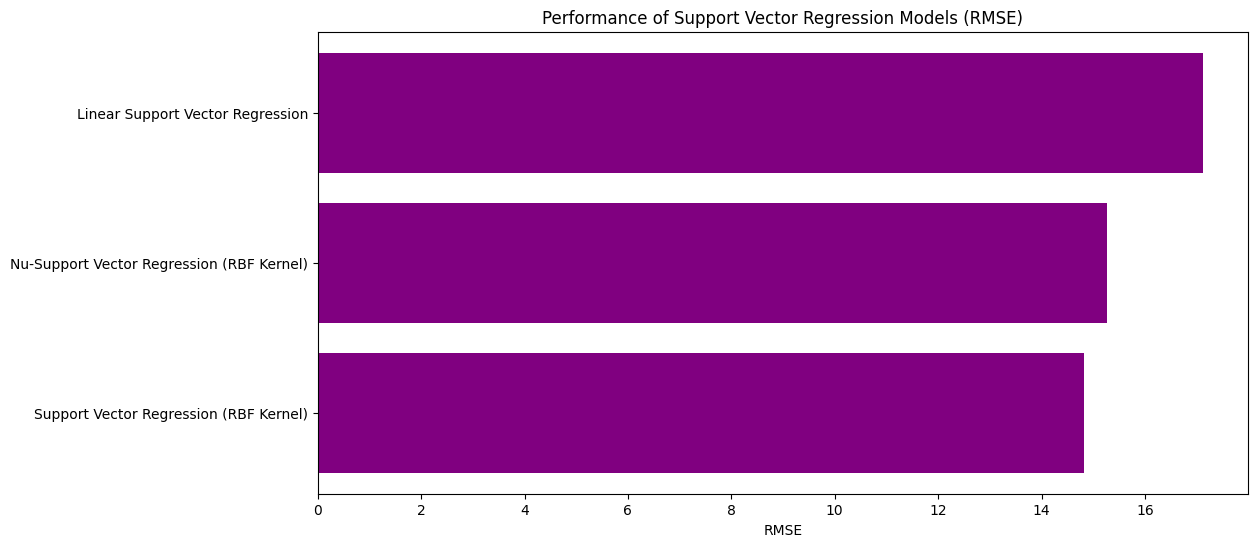

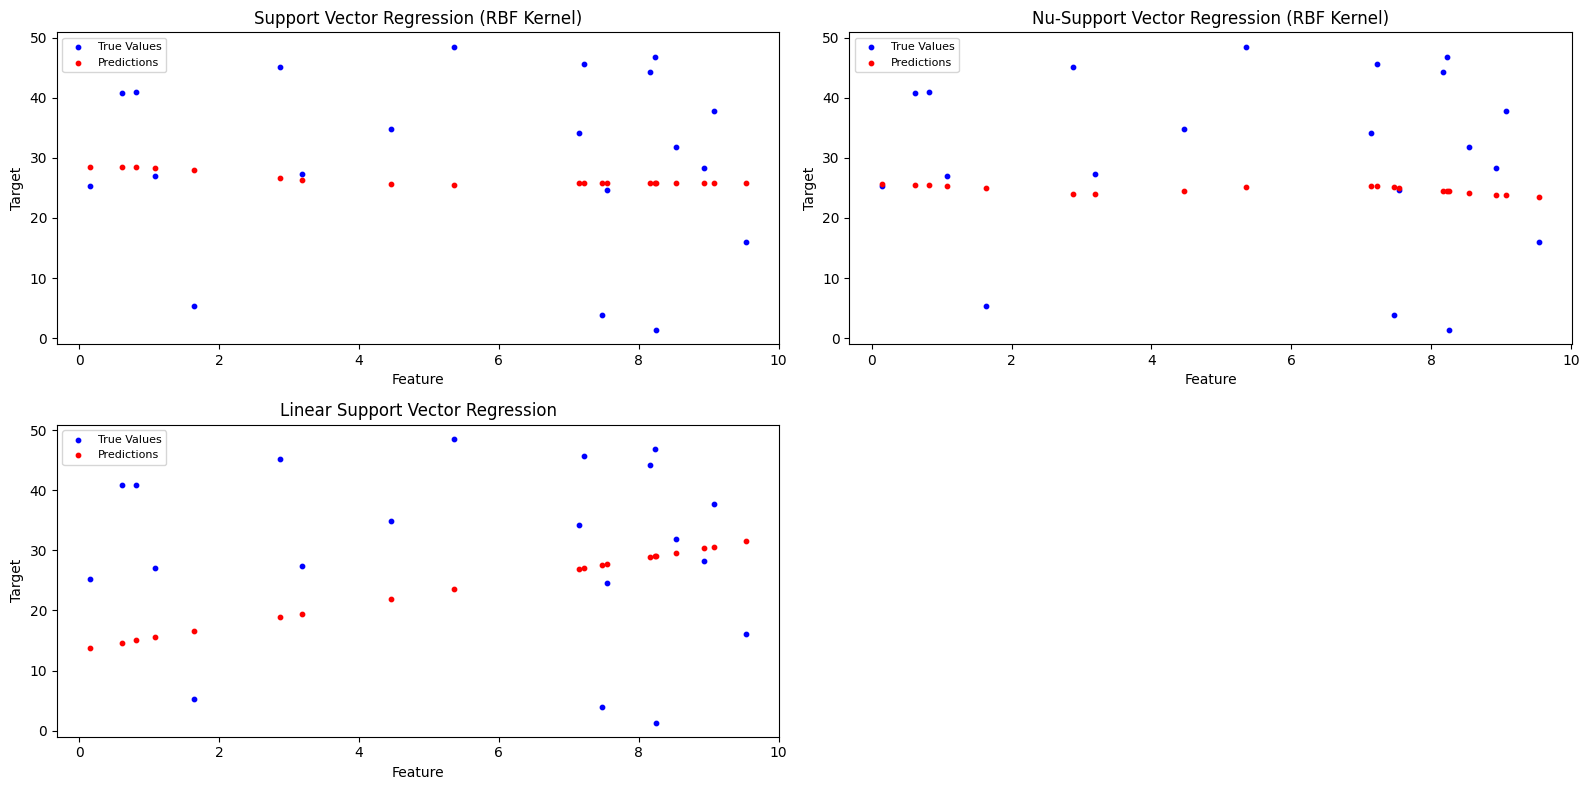

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
X, y = np.random.rand(100, 1) * 10, np.random.rand(100) * 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVR models
models_svr = {
    "Support Vector Regression (RBF Kernel)": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "Nu-Support Vector Regression (RBF Kernel)": NuSVR(kernel='rbf', nu=0.5, C=1.0),
    "Linear Support Vector Regression": LinearSVR(C=1.0, epsilon=0.1, random_state=42),
}

# Train, predict, and evaluate models
results_svr = {}
predictions_svr = {}
for name, model in models_svr.items():
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results_svr[name] = rmse
    predictions_svr[name] = y_pred

# Visualize RMSE
plt.figure(figsize=(12, 6))
plt.barh(list(results_svr.keys()), list(results_svr.values()), color='purple')
plt.xlabel("RMSE")
plt.title("Performance of Support Vector Regression Models (RMSE)")
plt.show()

# Visualize Predictions vs. True Values
plt.figure(figsize=(16, 8))
for i, (name, y_pred) in enumerate(predictions_svr.items()):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='True Values', s=10)
    plt.scatter(X_test, y_pred, color='red', label='Predictions', s=10)
    plt.title(name)
    plt.legend(loc="upper left", fontsize=8)
    plt.xlabel("Feature")
    plt.ylabel("Target")

plt.tight_layout()
plt.show()


支持向量回归 (Support Vector Regression, SVR) 是支持向量机 (SVM) 的回归扩展，主要用于处理回归问题。以下是支持向量回归中常见的模型及其变体：

---

### **支持向量回归模型分类**

#### **1. 标准支持向量回归 (SVR)**
- **模型名称**: Support Vector Regression (SVR)
- **实现库**: Scikit-learn 提供
- **特点**:
  - 基于核技巧，可以解决线性和非线性回归问题。
  - 支持线性核、多项式核、RBF 核和自定义核函数。
  - 引入 ε-不敏感损失函数，只对误差超过阈值的样本进行优化。

#### **2. Nu-Support Vector Regression (NuSVR)**
- **模型名称**: Nu-Support Vector Regression (NuSVR)
- **实现库**: Scikit-learn 提供
- **特点**:
  - 使用 `nu` 参数代替 `C` 和 `epsilon`，控制支持向量的比例。
  - 更适合在样本不均衡或对支持向量比例有严格要求的场景。

#### **3. LinearSVR**
- **模型名称**: Linear Support Vector Regression (LinearSVR)
- **实现库**: Scikit-learn 提供
- **特点**:
  - 专门针对线性核优化的 SVR 实现。
  - 计算效率较高，适合高维线性回归任务。

---


### **模型特点、适用场景及优缺点**

#### **1. SVR**
- **特点**：
  - 通过核函数处理非线性关系。
  - 使用 ε-不敏感损失函数，忽略误差较小的样本。
- **适用场景**：
  - 非线性关系数据。
  - 对小样本数据表现较好。
- **优点**：
  - 灵活性强，适合多种数据分布。
  - 支持多种核函数。
- **缺点**：
  - 训练时间复杂度高（特别是大数据）。
  - 参数调优复杂。

---

#### **2. NuSVR**
- **特点**：
  - 通过 `nu` 参数控制支持向量的比例。
  - 提供更多支持向量分布的灵活性。
- **适用场景**：
  - 需要严格控制支持向量数量的场景。
- **优点**：
  - 更灵活地控制模型复杂度。
- **缺点**：
  - 与 SVR 相比，调参更复杂。

---

#### **3. LinearSVR**
- **特点**：
  - 针对线性核优化的支持向量回归模型。
  - 不支持非线性核函数。
- **适用场景**：
  - 高维线性回归问题。
- **优点**：
  - 计算效率高，适合大规模数据。
- **缺点**：
  - 只能处理线性关系，无法捕捉非线性特性。

---

### **选型建议**
- **线性数据**：选择 `LinearSVR`，效率高且易于实现。
- **非线性数据**：选择 `SVR` 或 `NuSVR`，根据支持向量的分布需求选择具体模型。
- **小数据集或对核灵活性要求高**：优先选择 `SVR`。

